In [1]:
import random
import numpy as np
import torch
import os
import pathlib
import pickle
import pandas as pd
torch.manual_seed(42)
torch.cuda.manual_seed(42)

import Figure_H2H_Regret

from Performance import performance_evaluation
perfs = performance_evaluation()

from Performance import H2h_Regret_Evaluation
h2h_regret_eva = H2h_Regret_Evaluation()

from Data import Data_Simulator
DS_Obj = Data_Simulator()

from Oracle import Oracle_Processing
Oracle_Proc = Oracle_Processing()

from OLS import OLS_Processing
OLS_Proc = OLS_Processing()

from DDR import DDR_Processing
DDR_Proc = DDR_Processing()

from PYEPO import EPO_Processing
PYEPO_Proc = EPO_Processing()

from Data_Load_Store import Load_Store_Methods
Data_LSM = Load_Store_Methods()

In [2]:
import Baseline_Params 
import Sequential_Learning_Approaches as SLA
import Integrated_Learning_Approaches as ILA

### Parameters

In [3]:
data_generation_process = "SPO_Data_Generation"
# data_generation_process = "DDR_Data_Generation"

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
project_directory = os.path.dirname(os.path.dirname(os.path.dirname(parent_directory)))
middle_path = '/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_' + data_generation_process +"/"
working_dir = project_directory + middle_path
Result_dir = project_directory + middle_path + "Result/"
pathlib.Path(working_dir).mkdir(parents=True, exist_ok=True)
pathlib.Path(Result_dir).mkdir(parents=True, exist_ok=True)

In [4]:
Baseline_Params.set_Params(working_dir)
num_train, num_feat, num_test, deg, e, lower, upper, p, alpha, mis, coef_seed, x_dist, e_dist, x_low, x_up, x_mean, x_var, bump, grid_all, iteration_all,mu_all,lamb_all = Baseline_Params.get_Params(working_dir)

In [5]:
grid_all = [(3, 3)]
mu_all = [0.75]
lamb_all = [0.8]
mis = 8.0
deg = mis
num_train = 500
iteration_all = np.arange(0,100)

In [6]:
for grid in grid_all:
    L_N = grid[0]
    d = (L_N - 1) * (L_N - 1) * 2 + 2 * (L_N - 1) # num of arcs
    num_nodes = L_N*L_N

    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    pathlib.Path(DataPath).mkdir(parents=True, exist_ok=True)
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"x_test_all.pkl"):
        print("Already Exist")
    else:
        x_test_all, c_test_all, x_train_all, c_train_all,noise_train_all,noise_test_all,W_star_all = \
        DS_Obj.Simulator(DataPath,lower, upper, p, d, coef_seed,iteration_all,num_test, num_train, alpha,mis,data_generation_process,x_dist, e_dist, x_low, x_up, x_mean, x_var, bump)

        Data_LSM.store_input_data(DataPath,x_test_all,c_test_all,x_train_all,c_train_all,noise_test_all,noise_train_all,W_star_all)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_SPO_Data_Generation/3by3_grid/data_size=500_deg=8.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/


##### 2.1 Run Oracle

In [7]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]
    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_Oracle_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_Oracle(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_SPO_Data_Generation/3by3_grid/data_size=500_deg=8.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
Set parameter Username
Academic license - for non-commercial use only - expires 2026-03-13
Oracle: iter= 20 ,cost_Oracle_Ante= 58838.019665758504
Oracle: iter= 40 ,cost_Oracle_Ante= 34531.36279831257
Oracle: iter= 60 ,cost_Oracle_Ante= 40378.14894460804
Oracle: iter= 80 ,cost_Oracle_Ante= 62370.5700807594


##### 2.2 Run OLS

In [8]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]

    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_OLS_Ante_all.pkl"):
        print("Results already exist")
    else:
        SLA.Run_OLS(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_SPO_Data_Generation/3by3_grid/data_size=500_deg=8.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
OLS: iter= 20 ,cost_OLS_Ante= 69000.69985518101
OLS: iter= 40 ,cost_OLS_Ante= 40197.480192526134
OLS: iter= 60 ,cost_OLS_Ante= 47633.88299937575
OLS: iter= 80 ,cost_OLS_Ante= 67463.48864935596


##### 2.3.0 Run DDR

In [9]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]
    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_DDR_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.Run_DDR(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_SPO_Data_Generation/3by3_grid/data_size=500_deg=8.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 69000.69985518101
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 40197.480192526134
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 47633.88299937575
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 67463.48864935596


##### 2.3.1 Run DDR with quadratic term

In [10]:
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]
    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_DDR_Ante_quad_all.pkl"):
        print("Results already exist")
    else:
        ILA.Run_DDR_Quadratic(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_SPO_Data_Generation/3by3_grid/data_size=500_deg=8.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
DDR: iter= 20 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 61633.35725258093
DDR: iter= 40 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 36852.15610487602
DDR: iter= 60 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 42997.36816776181
DDR: iter= 80 ,mu= 0.75 ,lamb= 0.8 ,cost_DDR_Ante = 65320.21445510589


##### 2.3.2 Run DDR with self quadratic term

In [11]:
# for grid in grid_all:
#     from Network import network_design
#     Network = network_design()
#     arcs,arc_index_mapping = Network._getArcs(grid)
#     L_N = grid[0]
#     DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
#     DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#     print("DataPath:", DataPath)
#     if os.path.exists(DataPath+"cost_DDR_Ante_self_quad_all.pkl"): 
#         print("Results already exist")
#     else:
#         ILA.Run_DDR_self_Quadratic(DataPath,mu_all,lamb_all,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

##### 2.4.0 Run SPO+

In [12]:
method_names = ["spo+"]
for grid in grid_all:
    from Network import network_design
    Network = network_design()
    arcs,arc_index_mapping = Network._getArcs(grid)
    L_N = grid[0]
    DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
    DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
    print("DataPath:", DataPath)
    if os.path.exists(DataPath+"cost_spo+_Ante_all.pkl"):
        print("Results already exist")
    else:
        ILA.run_EPO_approaches(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_SPO_Data_Generation/3by3_grid/data_size=500_deg=8.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/
['spo+'] : iter= 20 ,cost_EPO_Ante= 64408.158401340246
['spo+'] : iter= 40 ,cost_EPO_Ante= 43140.61708692413
['spo+'] : iter= 60 ,cost_EPO_Ante= 46738.24622210642
['spo+'] : iter= 80 ,cost_EPO_Ante= 67650.4063346316


##### 2.4.1 Run SPO+ with quadratic term

In [13]:
# method_names = ["spo+"]
# for grid in grid_all:
#     from Network import network_design
#     Network = network_design()
#     arcs,arc_index_mapping = Network._getArcs(grid)
#     L_N = grid[0]
#     DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
#     DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#     print("DataPath:", DataPath)
#     if os.path.exists(DataPath+"cost_spo+_Ante_quad_all.pkl"):
#         print("Results already exist")
#     else:
#         ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

##### 2.4.2 Run SPO+ with self quadratic term

In [14]:
# method_names = ["spo+"]
# for grid in grid_all:
#     from Network import network_design
#     Network = network_design()
#     arcs,arc_index_mapping = Network._getArcs(grid)
#     L_N = grid[0]
#     DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
#     DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#     print("DataPath:", DataPath)
#     if os.path.exists(DataPath+"cost_spo+_Ante_self_quad_all.pkl"):
#         print("Results already exist")
#     else:
#         ILA.run_EPO_approaches_self_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

##### 2.5 Run PG

In [15]:
# method_names = ["pg"]
# for grid in grid_all:
#     from Network import network_design
#     Network = network_design()
#     arcs,arc_index_mapping = Network._getArcs(grid)
#     L_N = grid[0]

#     DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
#     DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#     print("DataPath:", DataPath)
#     if os.path.exists(DataPath+"cost_pg_Ante_quad_all.pkl"):
#         print("Results already exist")
#     else:
#         ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

##### 2.6 Run LTR

In [16]:
# method_names = ["ltr"]
# for grid in grid_all:
#     from Network import network_design
#     Network = network_design()
#     arcs,arc_index_mapping = Network._getArcs(grid)
#     L_N = grid[0]

#     DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
#     DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#     print("DataPath:", DataPath)
#     if os.path.exists(DataPath+"cost_ltr_Ante_quad_all.pkl"):
#         print("Results already exist")
#     else:
#         ILA.run_EPO_approaches_Quadratic(DataPath,method_names,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

##### 2.7 Run Random Forest

In [17]:
# for grid in grid_all:
#     from Network import network_design
#     Network = network_design()
#     arcs,arc_index_mapping = Network._getArcs(grid)
#     L_N = grid[0]

#     DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
#     DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#     print("DataPath:", DataPath)
#     if os.path.exists(DataPath+"cost_RF_Ante_quad_all.pkl"):
#         print("Results already exist")
#     else:
#         SLA.Run_Random_Forest_Quadratic(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

##### 2.8 Run XGBoost

In [18]:
# for grid in grid_all:
#     from Network import network_design
#     Network = network_design()
#     arcs,arc_index_mapping = Network._getArcs(grid)
#     L_N = grid[0]

#     DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
#     DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#     print("DataPath:", DataPath)
#     if os.path.exists(DataPath+"cost_XG_Ante_quad_all.pkl"):
#         print("Results already exist")
#     else:
#         SLA.Run_XGBoost_Quadratic(DataPath,arcs, grid,mis,bump,iteration_all,num_feat,data_generation_process)

### Comparison

In [19]:
from scipy.stats import gaussian_kde
from matplotlib import gridspec
import seaborn as sns
import matplotlib.pyplot as plt
def Upright_Figure(all_x, all_y, figure_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], 
                        ymin = 0, ymax=100,xmin = 0,xmax = 100):
    
    data = np.asarray([all_x,all_y])

    ####### Obtain KDE  
    #KDE for top marginal
    kde_X = gaussian_kde(data[0])
    #KDE for right marginal
    kde_Y = gaussian_kde(data[1])

    x = np.linspace(0, 100, 100)
    y = np.linspace(ymin, ymax, 100)

    dx = kde_X(x) # X-marginal density
    dy = kde_Y(y) # Y-marginal density

    #Define grid for subplots
    gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios = [1, 3])

    ####### Create scatter plot
    fig = plt.figure(figsize = size)
    ax = plt.subplot(gs[1, 0])
    cax = ax.scatter(data[0], data[1], s = 15, color='#003D7C', marker = "o", edgecolors = "#EF7C00")
    plt.xlabel('Head-to-head (%)')

    plt.ylabel('Regret reduction (%)') #pio
    plt.vlines(50, ymin, ymax, linestyle="dashed", alpha = 0.8,color = 'k')
    plt.hlines(0, xmin, xmax, linestyle="dashed", alpha = 0.8,color = 'k')

    # ####### Create Y-marginal (right)
    axr = plt.subplot(gs[1, 1], xticks = [], yticks = [], frameon = False)
    axr.plot(dy, y, color = 'black')

    axr.fill_betweenx(y, 0, dy, where = y <= 0.01, alpha = 1, color='#EF7C00')
    axr.fill_betweenx(y, 0, dy, where = y >= 0, alpha = 1, color='#003D7C')

    leftarea = np.round( sum(n <= 0 for n in all_y)/len(all_y),2 )
    rightarea = np.round( sum(n > 0 for n in all_y)/len(all_y),2 )

    axr.annotate(leftarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[0]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    axr.annotate(rightarea, xy=(0.15, abs(ymin)/(ymax - ymin) + move[1]), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)

    # ####### Create X-marginal (top)
    axt = plt.subplot(gs[0,0], frameon = False, yticks = [], xticks = [])
    #base = pyplot.gca().transData
    #rot = transforms.Affine2D().rotate_deg(180)
    axt.plot(x, dx, color = 'black')
    axt.fill_between(x, 0, dx, where = x >= 49.9, alpha= 1, color = '#003D7C')
    axt.fill_between(x, 0, dx, where = x <= 50, alpha= 1, color = '#EF7C00')

    #     axt.invert_yaxis()
    leftarea = np.round( sum(n <= 50 for n in all_x)/len(all_x),2 )
    rightarea = np.round( sum(n > 50 for n in all_x)/len(all_x),2 )

    axt.annotate(leftarea, xy=(move[2], 0.15), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)
    axt.annotate(rightarea, xy=(move[3], 0.15), xycoords='axes fraction', bbox=dict(boxstyle="round", fc="w"), size = 12)

    # ####### Bring the marginals closer to the scatter plot and save eps file
    fig.tight_layout(pad = 1)
    # # plt.savefig(figure_name + '.eps', format='eps')
    plt.savefig(figure_name + '.pdf', format='pdf')

In [20]:
def obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,benchmark):
    h2h_ = {}; cost_rd_ = {}; regret_rd_ = {}
    for grid in grid_all:
        L_N = grid[0]
        DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
        DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
        print("DataPath:", DataPath)     
        with open(DataPath+'cost_Oracle_Ante_all.pkl', "rb") as tf:
            cost_Oracle_Ante_all = pickle.load(tf)
        with open(DataPath+'cost_OLS_Ante_quad_all.pkl', "rb") as tf:
            cost_OLS_Ante_all = pickle.load(tf)
        with open(DataPath+'cost_DDR_Ante_quad_all.pkl', "rb") as tf:
            cost_DDR_Ante_all = pickle.load(tf)

        with open(DataPath+'cost_spo+_Ante_quad_all.pkl', "rb") as tf:
            cost_SPO_Ante_all = pickle.load(tf)
        with open(DataPath+'cost_rf_Ante_quad_all.pkl', "rb") as tf:
            cost_RF_Ante_all = pickle.load(tf)
        with open(DataPath+'cost_xg_Ante_quad_all.pkl', "rb") as tf:
            cost_XG_Ante_all = pickle.load(tf)

        for mu in mu_all:
            for lamb in lamb_all:
                if benchmark == "OLS":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_OLS_Ante_all,cost_Oracle_Ante_all)
                if benchmark == "SPO+":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
                if benchmark == "RF":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_RF_Ante_all,cost_Oracle_Ante_all)
                if benchmark == "XG":
                    h2h_[L_N,mu,lamb],regret_rd_[L_N,mu,lamb] = h2h_regret_eva.calculate_DDR_vs_Others_h2h_regret(mu,lamb,iteration_all,cost_DDR_Ante_all,cost_XG_Ante_all,cost_Oracle_Ante_all)
        print("Grid = ",grid)
    return h2h_,regret_rd_

### Comparison between DDR with/without quadratic term

In [21]:
grid = (3,3)
L_N = grid[0]
DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
print("DataPath:", DataPath)     
with open(DataPath+'cost_Oracle_Ante_all.pkl', "rb") as tf:
    cost_Oracle_Ante_all = pickle.load(tf)
with open(DataPath+'cost_OLS_Ante_all.pkl', "rb") as tf:
    cost_OLS_Ante_all = pickle.load(tf)
with open(DataPath+'cost_DDR_Ante_all.pkl', "rb") as tf:
    cost_DDR_Ante_all = pickle.load(tf)
with open(DataPath+'cost_DDR_Ante_quad_all.pkl', "rb") as tf:
    cost_DDR_Ante_quad_all = pickle.load(tf)

with open(DataPath+'cost_spo+_Ante_all.pkl', "rb") as tf:
    cost_SPO_Ante_all = pickle.load(tf)
# with open(DataPath+'cost_spo+_Ante_quad_all.pkl', "rb") as tf:
#     cost_SPO_Ante_quad_all = pickle.load(tf)
# with open(DataPath+'cost_spo+_Ante_self_quad_all.pkl', "rb") as tf:
#     cost_SPO_Ante_self_quad_all = pickle.load(tf)


DataPath: /Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_SPO_Data_Generation/3by3_grid/data_size=500_deg=8.0_e=0.5_num_test=1000_x_dist=uniform_e_dist=normal/


In [22]:
def cross_compare2plus(c_item, c_base, c_oracle):
    N = len(c_item)
    c_diff = c_base - c_item
    lbel = np.zeros((N,1))
    
    equals = np.sum(c_diff == 0)
    wins = np.sum(c_diff > 0) # indicate num of c_item is lower than c_base
    lose = np.sum(c_diff < 0)
    
    lbel[c_diff < 0] = 1
    lbel[c_diff > 0] = -1
    
#     print(N, equals, wins, lose)
    if N == equals:
        win_ratio = 0.5
    else:
        win_ratio = wins/(N - equals)
    cost_reduction = (np.nanmean(c_diff))/np.abs(np.nanmean(c_base))
    if np.nanmean(c_base) - np.nanmean(c_oracle) <= 1e-6:
        regret_reduction = 0.0
    else:
        regret_reduction = (np.nanmean(c_diff))/np.abs(np.nanmean(c_base) - np.nanmean(c_oracle))
    return win_ratio, cost_reduction, regret_reduction

In [23]:
def calculate_input_vs_benchmark(iteration_all,cost_input_all,cost_benchmark_all,cost_Oracle_Ante_all):
    
    h2h_ = np.zeros(len(iteration_all)); cost_rd_ = np.zeros(len(iteration_all)); regret_rd_ = np.zeros(len(iteration_all))
    for iter_index in range(len(iteration_all)):
        iter = iteration_all[iter_index]
        h2h_[iter_index],cost_rd_[iter_index],regret_rd_[iter_index] = cross_compare2plus(cost_input_all[iter], cost_benchmark_all[iter], cost_Oracle_Ante_all[iter])

    # return h2h_post,regret_post,h2h_ante,regret_ante
    return h2h_,regret_rd_

In [24]:
def generate_df(data_mat,indices,colums):
    df = pd.DataFrame(np.round(data_mat*100,4))
    df.index = indices
    df.columns = colums
    return df

In [25]:
def calculate_prob_avg(h2h_input,regret_rd_input,mu_all,lamb_all):
    h2h_prop = np.zeros((len(mu_all),len(lamb_all))); regret_rd_prop = np.zeros((len(mu_all),len(lamb_all)))
    h2h_avg = np.zeros((len(mu_all),len(lamb_all))); regret_rd_avg = np.zeros((len(mu_all),len(lamb_all)))
    mu_index = 0
    for mu in mu_all:
        lamb_index = 0
        for lamb in lamb_all:
            h2h_prop[mu_index,lamb_index] = len(h2h_input[mu,lamb][h2h_input[mu,lamb] >= 0.5])/len(h2h_input[mu,lamb])
            regret_rd_prop[mu_index,lamb_index] = len(regret_rd_input[mu,lamb][regret_rd_input[mu,lamb] > 0.0])/len(regret_rd_input[mu,lamb])

            h2h_avg[mu_index,lamb_index] = np.nanmean(h2h_input[mu,lamb])
            regret_rd_avg[mu_index,lamb_index] = np.nanmean(regret_rd_input[mu,lamb])

            lamb_index = lamb_index + 1
        mu_index = mu_index + 1
    return generate_df(h2h_prop,mu_all,lamb_all),generate_df(regret_rd_prop,mu_all,lamb_all),generate_df(h2h_avg,mu_all,lamb_all),generate_df(regret_rd_avg,mu_all,lamb_all)

In [26]:
h2h_ddr_wt_vs_ols_wo = {}; regret_rd_ddr_wt_vs_ols_wo = {}
h2h_ddr_wt_vs_spo_wo = {}; regret_rd_ddr_wt_vs_spo_wo = {}
h2h_ddr_wt_vs_spo_wt = {}; regret_rd_ddr_wt_vs_spo_wt = {}

h2h_ddr_wo_vs_ols_wo = {}; regret_rd_ddr_wo_vs_ols_wo = {}
h2h_ddr_wo_vs_spo_wo = {}; regret_rd_ddr_wo_vs_spo_wo = {}
h2h_ddr_wo_vs_spo_wt = {}; regret_rd_ddr_wo_vs_spo_wt = {}

mu_index = 0
for mu in mu_all:
    lamb_index = 0
    for lamb in lamb_all:
        cost_input_all = {}
        for iter in iteration_all:
            cost_input_all[iter] = cost_DDR_Ante_quad_all[iter,mu,lamb]
        h2h_ddr_wt_vs_ols_wo[mu,lamb], regret_rd_ddr_wt_vs_ols_wo[mu, lamb] = calculate_input_vs_benchmark(iteration_all,cost_input_all,cost_OLS_Ante_all,cost_Oracle_Ante_all)
        h2h_ddr_wt_vs_spo_wo[mu,lamb], regret_rd_ddr_wt_vs_spo_wo[mu, lamb] = calculate_input_vs_benchmark(iteration_all,cost_input_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
        # h2h_ddr_wt_vs_spo_wt[mu,lamb], regret_rd_ddr_wt_vs_spo_wt[mu, lamb] = calculate_input_vs_benchmark(iteration_all,cost_input_all,cost_SPO_Ante_self_quad_all,cost_Oracle_Ante_all)

        cost_input_all = {}
        for iter in iteration_all:
            cost_input_all[iter] = cost_DDR_Ante_all[iter,mu,lamb]
        h2h_ddr_wo_vs_ols_wo[mu,lamb], regret_rd_ddr_wo_vs_ols_wo[mu, lamb] = calculate_input_vs_benchmark(iteration_all,cost_input_all,cost_OLS_Ante_all,cost_Oracle_Ante_all)
        h2h_ddr_wo_vs_spo_wo[mu,lamb], regret_rd_ddr_wo_vs_spo_wo[mu, lamb] = calculate_input_vs_benchmark(iteration_all,cost_input_all,cost_SPO_Ante_all,cost_Oracle_Ante_all)
        # h2h_ddr_wo_vs_spo_wt[mu,lamb], regret_rd_ddr_wo_vs_spo_wt[mu, lamb] = calculate_input_vs_benchmark(iteration_all,cost_input_all,cost_SPO_Ante_self_quad_all,cost_Oracle_Ante_all)



In [27]:
# print("h2h max prop: without quadratic = ", np.max(h2h_ddr_vs_ols_wo_quad_prop),", with quadratic = ", np.max(h2h_ddr_vs_ols_wt_quad_prop))
# print("regret rd max prop: without quadratic = ", np.max(regret_rd_ddr_vs_ols_wo_quad_prop),", with quadratic = ", np.max(regret_rd_ddr_vs_ols_wt_quad_prop))

In [28]:
# print("h2h max avg: without quadratic = ", np.max(h2h_ddr_vs_ols_wo_quad_avg),", with quadratic = ", np.max(h2h_ddr_vs_ols_wt_quad_avg))
# print("regret rd max avg: without quadratic = ", np.max(regret_rd_ddr_vs_ols_wo_quad_avg),", with quadratic = ", np.max(regret_rd_ddr_vs_ols_wt_quad_avg))

In [29]:
# h2h_ddr_vs_ols_wo_quad_prop_df = generate_df(h2h_ddr_vs_ols_wo_quad_prop,[f"mu={mu}" for mu in mu_all],[f"lamb={lamb}" for lamb in lamb_all])
# regret_rd_ddr_vs_ols_wo_quad_prop_df = generate_df(regret_rd_ddr_vs_ols_wo_quad_prop,[f"mu={mu}" for mu in mu_all],[f"lamb={lamb}" for lamb in lamb_all])

# h2h_ddr_vs_ols_wt_quad_prop_df = generate_df(h2h_ddr_vs_ols_wt_quad_prop,[f"mu={mu}" for mu in mu_all],[f"lamb={lamb}" for lamb in lamb_all])
# regret_rd_ddr_vs_ols_wt_quad_prop_df = generate_df(regret_rd_ddr_vs_ols_wt_quad_prop,[f"mu={mu}" for mu in mu_all],[f"lamb={lamb}" for lamb in lamb_all])

# h2h_ddr_vs_ols_wo_quad_avg_df = generate_df(h2h_ddr_vs_ols_wo_quad_avg,[f"mu={mu}" for mu in mu_all],[f"lamb={lamb}" for lamb in lamb_all])
# regret_rd_ddr_vs_ols_wo_quad_avg_df = generate_df(regret_rd_ddr_vs_ols_wo_quad_avg,[f"mu={mu}" for mu in mu_all],[f"lamb={lamb}" for lamb in lamb_all])

# h2h_ddr_vs_ols_wt_quad_avg_df = generate_df(h2h_ddr_vs_ols_wt_quad_avg,[f"mu={mu}" for mu in mu_all],[f"lamb={lamb}" for lamb in lamb_all])
# regret_rd_ddr_vs_ols_wt_quad_avg_df = generate_df(regret_rd_ddr_vs_ols_wt_quad_avg,[f"mu={mu}" for mu in mu_all],[f"lamb={lamb}" for lamb in lamb_all])


##### DDR vs OLS

##### without quadratic

In [30]:
Result_dir

'/Users/zhangxun/Dropbox/Research/Decision_Driven_Regularization/Data_JOC_R1_Submit/Shortest_Path_Final/Quadratic_SPO_Data_Generation/Result/'

In [31]:
mu_all

[0.75]

In [32]:
lamb_all

[0.8]

In [33]:
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_OLS_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
all_x = h2h_ddr_wo_vs_ols_wo[mu,lamb] * 100
all_y = regret_rd_ddr_wo_vs_ols_wo[mu,lamb] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

##### with quadratic

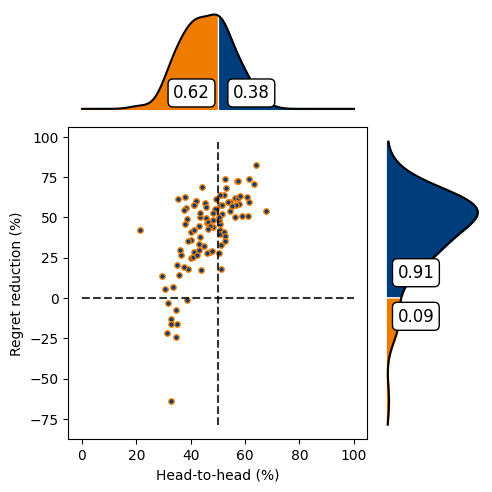

In [35]:
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_OLS_mu='+str(mu)+"_lamb="+str(lamb)+"_quadratic_ante_grid="+str(L_N)
all_x = h2h_ddr_wt_vs_ols_wo[mu,lamb] * 100
all_y = regret_rd_ddr_wt_vs_ols_wo[mu,lamb] * 100
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs SPO+

##### without quadratic

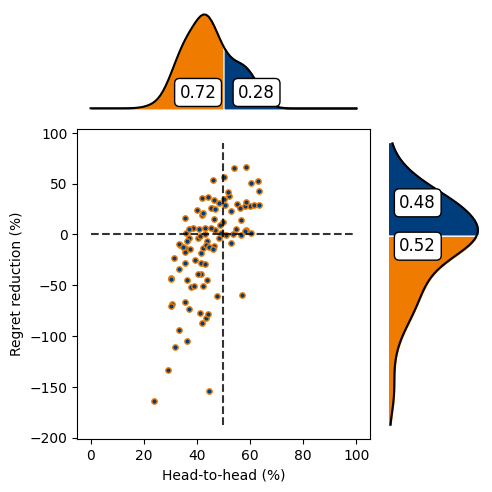

In [36]:
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_SPO_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
all_x = h2h_ddr_wo_vs_spo_wo[mu,lamb] * 100
all_y = regret_rd_ddr_wo_vs_spo_wo[mu,lamb] * 100
# Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [0.35, 0.75, 0.35, 0.75], ymin = 0, ymax=100,xmin = 0,xmax = 100)
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

In [ ]:
mu = 0.75
lamb = 0.8
file_name = Result_dir + 'DDR_vs_SPO_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_quadratic_grid="+str(L_N)
all_x = h2h_ddr_wt_vs_spo_wo[mu,lamb] * 100
all_y = regret_rd_ddr_wt_vs_spo_wo[mu,lamb] * 100
# Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ymin = 0, ymax=100,xmin = 0,xmax = 100)
Figure_H2H_Regret.figure_plot_upright(all_x, all_y, file_name, size = (5, 5), move = [-0.07, 0.07, 0.35, 0.55], ysame = 0, yrange = [6,6], sublabel = '', ypio = 0)

##### DDR vs Random Forest

In [ ]:
# h2h_ddr_vs_rf_ante,regret_rd_ddr_vs_rf_ante = obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,"RF")

In [ ]:
# L_N = 3
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + 'DDR_vs_RF_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
# all_x = h2h_ddr_vs_rf_ante[L_N,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_rf_ante[L_N,mu,lamb] * 100
# Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [0.35, 0.75, 0.35, 0.75], ymin = 0, ymax=100,xmin = 0,xmax = 100)

##### DDR vs XGBoost

In [ ]:
# h2h_ddr_vs_xg_ante,regret_rd_ddr_vs_xg_ante = obtain_DDR_vs_benchmarks_h2h_regret(grid_all,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist,mu_all,lamb_all,"XG")

In [ ]:
# L_N = 3
# mu = 0.75
# lamb = 0.8
# file_name = Result_dir + 'DDR_vs_XG_mu='+str(mu)+"_lamb="+str(lamb)+"_ante_grid="+str(L_N)
# all_x = h2h_ddr_vs_xg_ante[L_N,mu,lamb] * 100
# all_y = regret_rd_ddr_vs_xg_ante[L_N,mu,lamb] * 100
# Upright_Figure(all_x, all_y, file_name, size = (5, 5), move = [0.35, 0.75, 0.35, 0.75], ymin = 0, ymax=100,xmin = 0,xmax = 100)

#### RMSE

In [ ]:
# def obtain_RMSE(grid_all,file_name,iteration_all,is_DDR,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist):
#     RMSE_ = {}
#     for grid in grid_all:
#         L_N = grid[0]
#         DataPath_parent = project_directory + middle_path +str(L_N)+'by'+str(L_N)+'_grid/'
#         DataPath = DataPath_parent + f"data_size={num_train}_deg={deg}_e={e}_num_test={num_test}"+"_x_dist="+x_dist+"_e_dist="+e_dist+"/"
#         print("DataPath:", DataPath)     
#         with open(DataPath+file_name, "rb") as tf:
#             RMSE_all = pickle.load(tf)
#         if is_DDR:
#             RMSE_[L_N] = [RMSE_all[iter,mu,lamb] for iter in iteration_all]
#         else:
#             RMSE_[L_N] = [RMSE_all[iter] for iter in iteration_all]
#         print("Grid = ",grid)
#     return RMSE_

In [ ]:
# mu=0.75
# lamb = 0.8

# RMSE_in_OLS = obtain_RMSE(grid_all,'RMSE_in_OLS_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)
# RMSE_out_OLS = obtain_RMSE(grid_all,'RMSE_out_OLS_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)

# RMSE_in_RF = obtain_RMSE(grid_all,'RMSE_in_RF_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)
# RMSE_out_RF = obtain_RMSE(grid_all,'RMSE_out_RF_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)

# RMSE_in_XG = obtain_RMSE(grid_all,'RMSE_in_XG_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)
# RMSE_out_XG = obtain_RMSE(grid_all,'RMSE_out_XG_all.pkl',iteration_all,False,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)

# RMSE_in_DDR = obtain_RMSE(grid_all,'RMSE_in_DDR_all.pkl',iteration_all,True,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)
# RMSE_out_DDR = obtain_RMSE(grid_all,'RMSE_out_DDR_all.pkl',iteration_all,True,mu,lamb,project_directory,middle_path,num_train,deg,e,num_test,x_dist,e_dist)

In [ ]:
# print("RMSE_in_OLS=",np.round(np.nanmean(RMSE_in_OLS[L_N]),4),",RMSE_out_OLS=",np.round(np.nanmean(RMSE_out_OLS[L_N]),4))
# print("RMSE_in_RF=",np.round(np.nanmean(RMSE_in_RF[L_N]),4),",RMSE_out_RF=",np.round(np.nanmean(RMSE_out_RF[L_N]),4))
# print("RMSE_in_XG=",np.round(np.nanmean(RMSE_in_XG[L_N]),4),",RMSE_out_XG=",np.round(np.nanmean(RMSE_out_XG[L_N]),4))
# print("RMSE_in_DDR=",np.round(np.nanmean(RMSE_in_DDR[L_N]),4),",RMSE_out_DDR=",np.round(np.nanmean(RMSE_out_DDR[L_N]),4))

In [ ]:
# q_tile = 0.05
# print("5% tile RMSE_in_OLS=",np.round(np.quantile(RMSE_in_OLS[L_N],q_tile),4),",RMSE_out_OLS=",np.round(np.quantile(RMSE_out_OLS[L_N],q_tile),4))
# print("5% tile RMSE_in_RF=",np.round(np.quantile(RMSE_in_RF[L_N],q_tile),4),",RMSE_out_RF=",np.round(np.quantile(RMSE_out_RF[L_N],q_tile),4))
# print("5% RMSE_in_XG=",np.round(np.quantile(RMSE_in_XG[L_N],q_tile),4),",RMSE_out_XG=",np.round(np.quantile(RMSE_out_XG[L_N],q_tile),4))
# print("5% RMSE_in_DDR=",np.round(np.quantile(RMSE_in_DDR[L_N],q_tile),4),",RMSE_out_DDR=",np.round(np.quantile(RMSE_out_DDR[L_N],q_tile),4))

In [ ]:
# q_tile = 0.95
# print("95% tile RMSE_in_OLS=",np.round(np.quantile(RMSE_in_OLS[L_N],q_tile),4),",RMSE_out_OLS=",np.round(np.quantile(RMSE_out_OLS[L_N],q_tile),4))
# print("95% tile RMSE_in_RF=",np.round(np.quantile(RMSE_in_RF[L_N],q_tile),4),",RMSE_out_RF=",np.round(np.quantile(RMSE_out_RF[L_N],q_tile),4))
# print("95% RMSE_in_XG=",np.round(np.quantile(RMSE_in_XG[L_N],q_tile),4),",RMSE_out_XG=",np.round(np.quantile(RMSE_out_XG[L_N],q_tile),4))
# print("95% RMSE_in_DDR=",np.round(np.quantile(RMSE_in_DDR[L_N],q_tile),4),",RMSE_out_DDR=",np.round(np.quantile(RMSE_out_DDR[L_N],q_tile),4))